In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("clean_test.csv")

df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,741,742,743,744,745,746,747,748,749,750
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,4181.971005,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Alogaritma K-mean Clustering

In [7]:
model = KMeans(n_clusters=3)

In [18]:
points = df[['Num_Bank_Accounts', 'Monthly_Inhand_Salary']]

In [19]:
model.fit(points)

KMeans(n_clusters=3)

In [20]:
cluster_array = model.labels_

In [21]:
print(cluster_array)

[2 2 2 ... 0 0 0]


## Visualisasi

In [22]:
X = points['Num_Bank_Accounts']
Y = points['Monthly_Inhand_Salary']

In [23]:
centroid = model.cluster_centers_

In [24]:
centroid

array([[   16.42869603,  4821.41180344],
       [   13.2296757 , 10075.13728445],
       [   18.28987174,  1838.26127858]])

In [25]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [26]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,16.428696
1,13.229676
2,18.289872


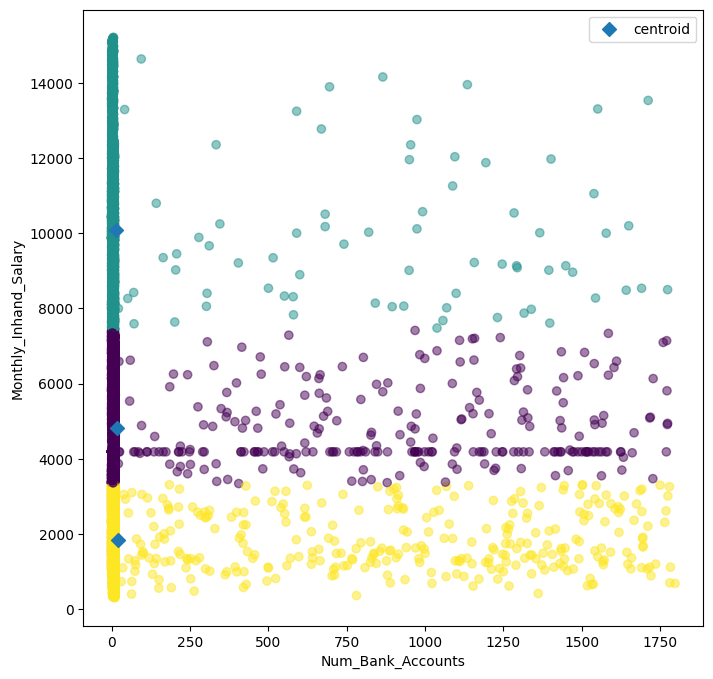

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, alpha=0.5, c=cluster_array)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel("Num_Bank_Accounts")
plt.ylabel('Monthly_Inhand_Salary')
plt.legend()
plt.show()

## Metode Elbow

In [28]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

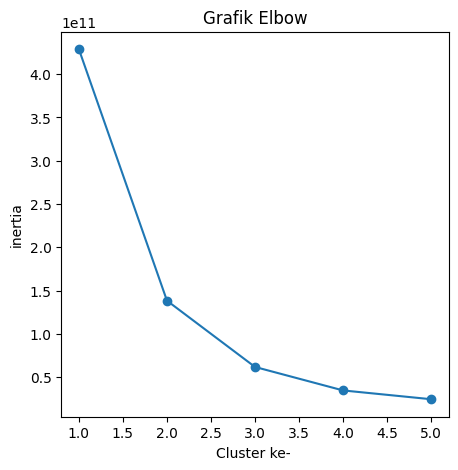

In [29]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()